In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import false_discovery_control

In [ ]:

sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from utils import Reds2

In [ ]:
# trait_enrichment_df = pd.concat([pd.DataFrame(j) for j in trait_enrichment_result_rows], ignore_index=True)
# trait_enrichment_df.to_csv("ct_trait_enrichment.csv.gz", index=False)
trait_enrichment_df = pd.read_csv("ct_trait_enrichment.csv.gz", header=None)
trait_enrichment_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,H3K27ac Histone ChIP-seq,adrenal gland,endothelial-cell,Seropositivity for human adenovirus 12 peptide...,1.0,0.0,0.0,16976.898305,0,59,1,25682
1,H3K27ac Histone ChIP-seq,adrenal gland,endothelial-cell,"Medication use (adrenergics, inhalants)",1.0,0.0,0.0,225.619794,0,59,9,25674
2,H3K27ac Histone ChIP-seq,adrenal gland,endothelial-cell,Pregnancy-specific beta-1-glycoprotein 5 levels,1.0,0.0,0.0,16976.898305,0,59,1,25682
3,H3K27ac Histone ChIP-seq,adrenal gland,endothelial-cell,Urine allo-threonine levels in chronic kidney ...,1.0,0.0,0.0,16976.898305,0,59,1,25682
4,H3K27ac Histone ChIP-seq,adrenal gland,endothelial-cell,Menstruation quality of life impact (acne),1.0,0.0,0.0,16976.898305,0,59,1,25682


In [26]:
trait_enrichment_df.columns = ("Assay", "Organ", "Cell type", "Trait", "p-value", "Odds ratio", "Odds ratio (low)", "Odds ratio (high)", "a", "b", "c", "d")
extended_trait_enrichment_df = trait_enrichment_df.copy()
extended_trait_enrichment_df["Cell type"] = extended_trait_enrichment_df["Cell type"].str.replace("-", " ", regex=True)
extended_trait_enrichment_df["q-value"] = 1.
extended_trait_enrichment_df.loc[extended_trait_enrichment_df["a"]>0, "q-value"] = false_discovery_control(extended_trait_enrichment_df.loc[extended_trait_enrichment_df["a"]>0, "p-value"], method="bh")
extended_trait_enrichment_df[r"-log($P$-value)"] = -1 * np.log(extended_trait_enrichment_df["p-value"])
extended_trait_enrichment_df[r"-log($Q$-value)"] = -1 * np.log(extended_trait_enrichment_df["q-value"])

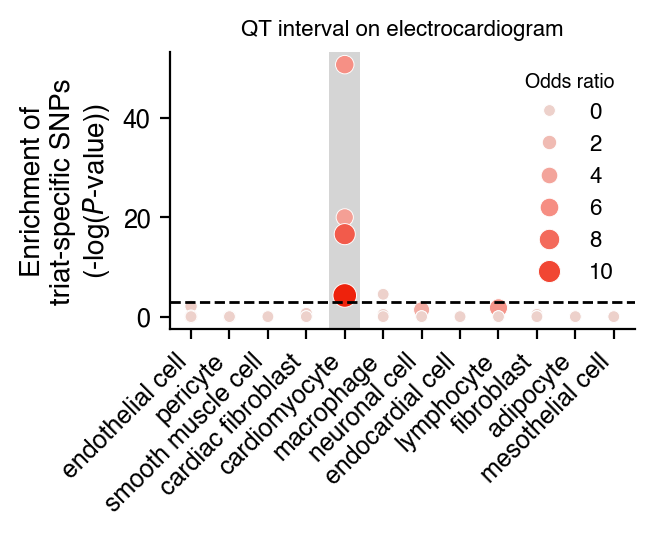

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1.8))
organ = "heart"
trait = "QT interval"
scatter = sns.scatterplot(
    x="Cell type", y=r"-log($P$-value)", size="Odds ratio", hue="Odds ratio", # style="Assay",
    data=extended_trait_enrichment_df.loc[(extended_trait_enrichment_df["Organ"]==organ) & (extended_trait_enrichment_df["Trait"]==trait)],
    palette=Reds2
)
ax.axhline(-np.log(0.05), lw=1, linestyle="dashed", color="black")
ax.axvspan(3.6, 4.4, zorder=0, alpha=0.33, color="gray", lw=0)
plt.xticks(rotation=45, ha="right")
ax.set_title(trait + " on electrocardiogram")
ax.set_xlabel("")
ax.set_ylabel("Enrichment of\ntriat-specific SNPs\n"+r"(-log($P$-value))")

handles, labels = scatter.get_legend_handles_labels()
sns.despine()

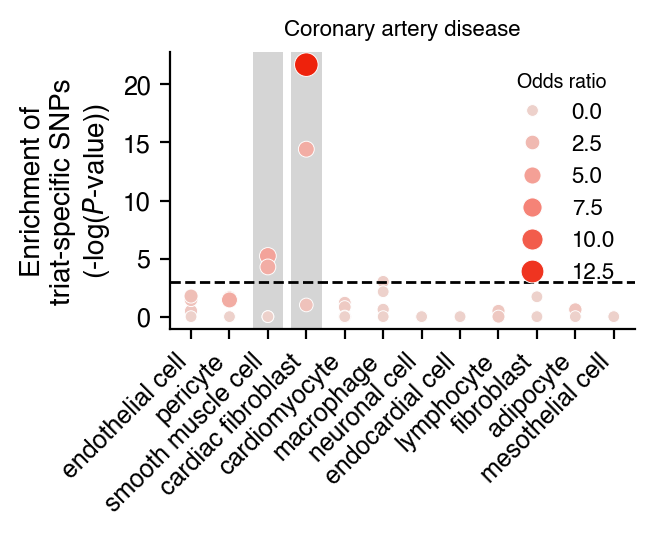

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1.8))
organ = "heart"
trait = "Coronary artery disease"
sns.scatterplot(
    x="Cell type", y=r"-log($P$-value)", size="Odds ratio", hue="Odds ratio",
    data=extended_trait_enrichment_df.loc[(extended_trait_enrichment_df["Organ"]==organ) & (extended_trait_enrichment_df["Trait"]==trait)],
    palette=Reds2,
)
ax.axhline(-np.log(0.05), lw=1, linestyle="dashed", color="black")
ax.axvspan(1.6, 2.4, zorder=0, alpha=0.33, color="gray", lw=0)
ax.axvspan(2.6, 3.4, zorder=0, alpha=0.33, color="gray", lw=0)
plt.xticks(rotation=45, ha="right")
ax.set_title(trait)
ax.set_xlabel("")
ax.set_ylabel("Enrichment of\ntriat-specific SNPs\n"+r"(-log($P$-value))")
sns.despine()

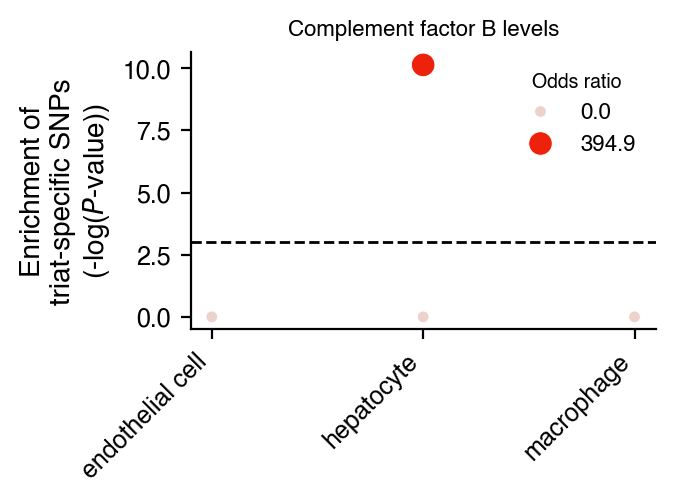

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1.8))
organ = "liver"
trait = "Complement factor B levels"
sub_df = extended_trait_enrichment_df.loc[(extended_trait_enrichment_df["Organ"]==organ) & (extended_trait_enrichment_df["Trait"]==trait)]
sub_df.loc[sub_df.a+sub_df.b<5, "Odds ratio"] = np.nan

scatter = sns.scatterplot(
    x="Cell type", y=r"-log($P$-value)", size="Odds ratio", hue="Odds ratio",
    data=sub_df,
    palette=Reds2
)
ax.axhline(-np.log(0.05), lw=1, linestyle="dashed", color="black")
plt.xticks(rotation=45, ha="right")
ax.set_title(trait)
ax.set_xlabel("")

handles, labels = scatter.get_legend_handles_labels()
labels = [f'{float(label):.1f}' for label in labels]
scatter.legend(handles, labels, title='Odds ratio', loc='upper right')
ax.set_ylabel("Enrichment of\ntriat-specific SNPs\n"+r"(-log($P$-value))")
sns.despine()

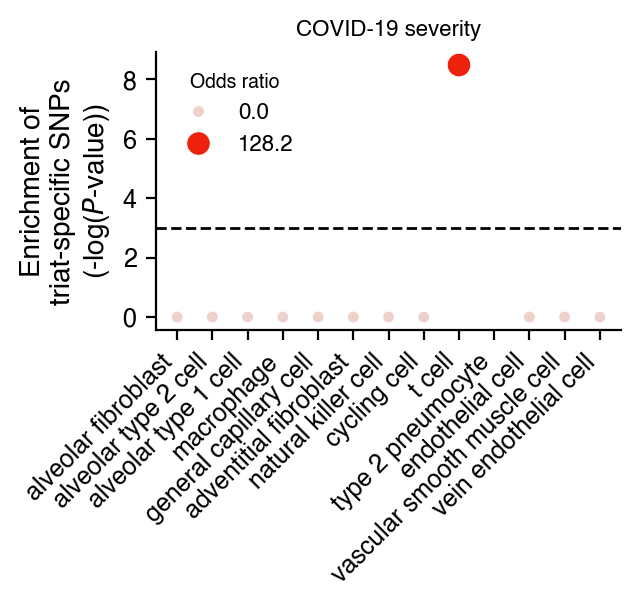

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1.8))
organ = "lung"
trait = "COVID-19 severity"
sub_df = extended_trait_enrichment_df.loc[(extended_trait_enrichment_df["Organ"]==organ) & (extended_trait_enrichment_df["Trait"]==trait)]
sub_df.loc[sub_df.a+sub_df.b<5, "Odds ratio"] = np.nan
scatter = sns.scatterplot(
    x="Cell type", y=r"-log($P$-value)", size="Odds ratio", hue="Odds ratio",
    data=sub_df,
    palette=Reds2
)
ax.axhline(-np.log(0.05), lw=1, linestyle="dashed", color="black")
plt.xticks(rotation=45, ha="right")
ax.set_title(trait)
ax.set_xlabel("")

handles, labels = scatter.get_legend_handles_labels()
labels = [f'{float(label):.1f}' for label in labels]
scatter.legend(
    handles, labels, title='Odds ratio', 
    loc='upper left'
)
ax.set_ylabel("Enrichment of\ntriat-specific SNPs\n"+r"(-log($P$-value))")
sns.despine()